In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
path=r"C:\Users\hp laptop\Downloads\Covid-19"

In [19]:
dis=os.listdir(path)
dis

['COVID19', 'Normal']

In [21]:
dis.index('Normal')

1

In [22]:
Data=[]
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(150,150))
        T=dis.index(i)
        Data.append([C,T])

In [23]:
i=r"C:\Users\hp laptop\Downloads\Covid-19\COVID19\C11.jpg"

In [24]:
k=cv.imread(i)
k

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [4, 4, 4],
        [1, 1, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [25]:
k.shape

(2840, 2972, 3)

In [26]:
Data[1]

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [187, 187, 187],
         [187, 187, 187],
         [190, 190, 190]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [205, 205, 205],
         [199, 199, 199],
         [194, 194, 194]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [209, 209, 209],
         [217, 217, 217],
         [217, 217, 217]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [111, 111, 111],
         [ 72,  72,  72],
         [ 37,  37,  37]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [145, 145, 145],
         [ 86,  86,  86],
         [ 48,  48,  48]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [165, 165, 165],
  

In [27]:
len(Data)

60

In [ ]:
import random 
random.shuffle()

In [28]:
import random #for shuffle
random.shuffle(Data)

In [30]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [31]:
T1=pd.get_dummies(T).replace({True:1,False:0})
T1

,0,1
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [32]:
F=np.array(F)

In [33]:
F1=F/255

In [34]:
F1[1]

array([[[0.32941176, 0.3372549 , 0.33333333],
        [0.27058824, 0.28235294, 0.27843137],
        [0.24313725, 0.25098039, 0.25098039],
        ...,
        [0.01568627, 0.02745098, 0.02745098],
        [0.01568627, 0.02745098, 0.02352941],
        [0.00784314, 0.01176471, 0.01176471]],

       [[0.55686275, 0.54901961, 0.54901961],
        [0.52941176, 0.52156863, 0.52156863],
        [0.46666667, 0.4627451 , 0.4627451 ],
        ...,
        [0.14117647, 0.1372549 , 0.1372549 ],
        [0.08235294, 0.07843137, 0.07843137],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.50196078, 0.50196078, 0.50196078],
        [0.54509804, 0.54509804, 0.54509804],
        [0.48235294, 0.48235294, 0.48235294],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.38431373, 0.38431373, 0.38431373],
        [0.38039216, 0.38823529, 0.38823529]],

       ...,

       [[0.21176471, 0.21176471, 0.21176471],
        [0.36470588, 0.36470588, 0.36470588],
        [0.40784314, 0

In [35]:
F1.shape

(60, 150, 150, 3)

In [36]:
T1.shape

(60, 2)

In [37]:
T2=np.array(T1)

In [49]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [50]:
vgg=VGG16(input_shape=(150,150,3)
         ,weights='imagenet'
         ,include_top=False)

In [52]:
for i in vgg.layers:
    i.trainable=False

In [53]:
x=Flatten()(vgg.output)

In [64]:
z=Dense(2,activation='sigmoid')(x)

In [65]:
model=Model(vgg.input,z)

In [66]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(F1,T2,epochs=5,validation_split=0.15,batch_size=15)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5417 - loss: 0.7799 - val_accuracy: 0.6667 - val_loss: 0.4226
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6277 - loss: 0.5033 - val_accuracy: 0.7778 - val_loss: 0.3171
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9231 - loss: 0.2733 - val_accuracy: 1.0000 - val_loss: 0.1104
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9052 - loss: 0.2210 - val_accuracy: 1.0000 - val_loss: 0.0712
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9631 - loss: 0.1369 - val_accuracy: 1.0000 - val_loss: 0.0774


In [69]:
test=r"C:\Users\hp laptop\Downloads\Covid-19\Normal\N9.jpg"

In [70]:
A1=cv.imread(test)
A1

array([[[ 1,  1,  1],
        [ 9,  9,  9],
        [14, 14, 14],
        ...,
        [17, 17, 17],
        [13, 13, 13],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 8,  8,  8],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [13, 13, 13],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 7,  7,  7],
        [12, 12, 12],
        ...,
        [17, 17, 17],
        [13, 13, 13],
        [ 4,  4,  4]],

       ...,

       [[ 3,  3,  3],
        [22, 22, 22],
        [28, 28, 28],
        ...,
        [17, 17, 17],
        [ 9,  9,  9],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [22, 22, 22],
        [28, 28, 28],
        ...,
        [17, 17, 17],
        [ 9,  9,  9],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [22, 22, 22],
        [28, 28, 28],
        ...,
        [17, 17, 17],
        [ 9,  9,  9],
        [ 0,  0,  0]]], dtype=uint8)

In [73]:
A2=cv.resize(A1,(150,150))

In [74]:
A3=np.reshape(A2,(1,150,150,3))

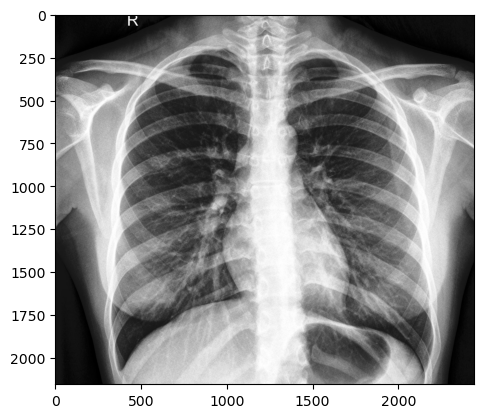

In [75]:
plt.imshow(A1)

In [76]:
pred=model.predict(A3)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


array([[2.4382546e-20, 1.0000000e+00]], dtype=float32)

In [77]:
pred[0][0]

2.4382546e-20

In [78]:
if pred[0][0]<10:
    print('Positive')
else:
    print('Normal')

Positive


In [82]:
path_test=r"C:\Users\hp laptop\Downloads\Covid-19"

In [83]:
dis=os.listdir(path_test)
dis

['COVID19', 'Normal']

In [84]:

Data1=[]
for i in dis:
    A=os.path.join(path_test,i)
    #print(i)
    #print(A)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        #print(B)
        img=cv.imread(B)
        #print(img.shape)
        #plt.imshow(img)
        #plt.show()
        array=cv.resize(img,(150,150))
        #print(array.shape)
        #plt.imshow(array)
        #plt.show()
        labels=dis.index(i)
        #print(labels)
        Data1.append([array,labels])                                                 

In [85]:
F=[]
T=[]
for i,j in Data1:
    F.append(i)
    T.append(j)

In [86]:
F=np.array(F)
T=np.array(T)

In [87]:
F=F/255

In [88]:
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
pred2=model.predict(F)
pred2

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


array([[0.8994886 , 0.37398836],
       [0.96997523, 0.13946742],
       [0.96243787, 0.16856518],
       [0.74021506, 0.66028017],
       [0.8861138 , 0.3898818 ],
       [0.92280704, 0.24669968],
       [0.96586156, 0.17692846],
       [0.95225906, 0.15358838],
       [0.96750015, 0.14797322],
       [0.9687418 , 0.22847131],
       [0.8224592 , 0.55774593],
       [0.9385572 , 0.2925246 ],
       [0.945775  , 0.2380348 ],
       [0.91250217, 0.42336085],
       [0.95561874, 0.13041322],
       [0.9706145 , 0.1098004 ],
       [0.88861734, 0.3933554 ],
       [0.7293166 , 0.7218444 ],
       [0.8549511 , 0.48108834],
       [0.96130526, 0.17502165],
       [0.94928616, 0.2086772 ],
       [0.77551746, 0.63823736],
       [0.9104954 , 0.29769292],
       [0.9792087 , 0.0982091 ],
       [0.8618245 , 0.5095362 ],
       [0.8761605 , 0.38557473],
       [0.97989583, 0.15219444],
       [0.9505943 , 0.33558944],
       [0.85693157, 0.5126851 ],
       [0.9406047 , 0.28119966],
       [0.

In [90]:
Final=[]
for i in pred2:
    Final.append(np.argmax(i))

In [91]:
Final

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [92]:
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [95]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
accuracy_score(T,Final)


1.0

In [96]:
c=confusion_matrix(T,Final)
c

array([[30,  0],
       [ 0, 30]], dtype=int64)

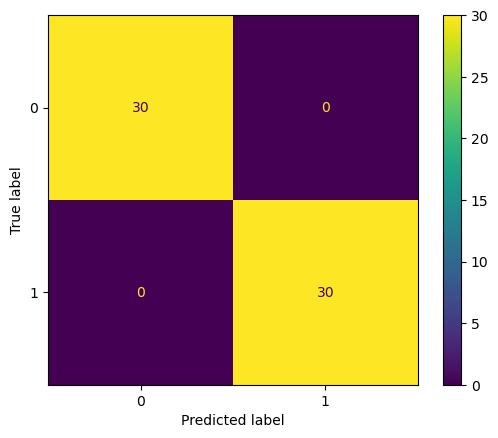

In [97]:
Cm=ConfusionMatrixDisplay(confusion_matrix=c)
Cm.plot()
plt.show()

In [98]:
confusion_matrix(T,Final)

array([[30,  0],
       [ 0, 30]], dtype=int64)

In [99]:
print(classification_report(T,Final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

